# Answering questions

In [2]:
# Import packages
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import cm as CM
from matplotlib import mlab as ML
import pandas as pd
import numpy as np

# Read in data
df = pd.read_csv('../output.csv')
print "Data types:"
print df.dtypes

Data types:
cx          int64
cy          int64
cz          int64
unmasked    int64
synapses    int64
dtype: object


## Descriptive
* How many Nan, Inf, or other "bad" data values are there?

In [2]:
isNan = df.isnull()
isInf = np.isinf(df)
isNeg = df < 0

print "Number of nan values by column:"
print isNan.sum(), "\n"
print "Number of rows with nan values:", isNan.sum(1).sum(), "\n"

print "Number of inf values by column:"
print isInf.sum(), "\n"
print "Number of rows with inf values:", isInf.sum(1).sum(), "\n"

print "Number of negative values by column:"
print isNeg.sum(), "\n"
print "Number of rows with negative values:", isNeg.sum(1).sum(), "\n"

Number of nan values by column:
cx          0
cy          0
cz          0
unmasked    0
synapses    0
dtype: int64 

Number of rows with nan values: 0 

Number of inf values by column:
cx          0
cy          0
cz          0
unmasked    0
synapses    0
dtype: int64 

Number of rows with inf values: 0 

Number of negative values by column:
cx          0
cy          0
cz          0
unmasked    0
synapses    0
dtype: int64 

Number of rows with negative values: 0 



### Quantities
 * How many synapses total are there?

In [3]:
nSyn = df['synapses'].sum()
print "There are", nSyn, "total synapses in the data."

There are 7704178 total synapses in the data.


 * How many bins are there?

In [4]:
nBins = df['synapses'].count()
print "There are", nBins, "total 3D bins."

There are 61776 total 3D bins.


### Statistics
 * What's the maximum number of synapses within a bin?

In [5]:
print "The maximum number of synapses per bin is", df['synapses'].max()

The maximum number of synapses per bin is 507


 * What's the mean number of synapses within a bin?

In [6]:
print "The average number of synapses per bin is {:0.2f}".format(float(nSyn)/nBins)

The average number of synapses per bin is 124.71


 * What's the median number of synapses per bin?

In [7]:
print "The median number of synapses per bin is {:0.0f}".format(df['synapses'].median())

The median number of synapses per bin is 144


 * What's the standard deviation?

In [8]:
print "The standard deviation of the number of synapses per bin is {:0.3f}".format(df['synapses'].std())

The standard deviation of the number of synapses per bin is 91.998


* What is the resolution of the scanned volume?

In [9]:
# Calculate resolution
temp = df.max() - df.min()
n = [df.groupby(d).ngroups for d in ['cx','cy','cz']]
res = [temp[i]/(n[i] - 1) for i in range(3)]

# guessing units based on Bock 2011 article
print "The resolution of the scanned volume is", float(res[0])/10, "x", float(res[1])/10, "x", float(res[2])/20,"um^3"

The resolution of the scanned volume is 3.9 x 3.9 x 5.55 um^3


* What is the size of the scanned volume?

In [10]:
# Calculate dimensions
dims = [temp[i]+res[i] for i in range(3)]

# guessing units based on Bock 2011 article
print "The dimensions of the scanned volume are", float(dims[0])/10, "x", float(dims[1])/10, "x", float(dims[2])/20,"um^3"

The dimensions of the scanned volume are 421.2 x 202.8 x 61.05 um^3


## Exploratory
* What do the distributions of synapse locations look like in the x, y, z coordinates?

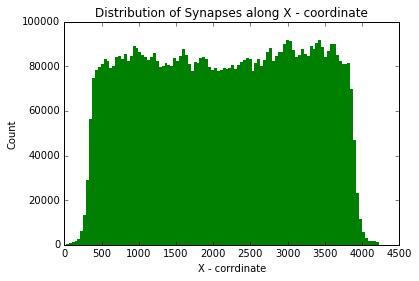

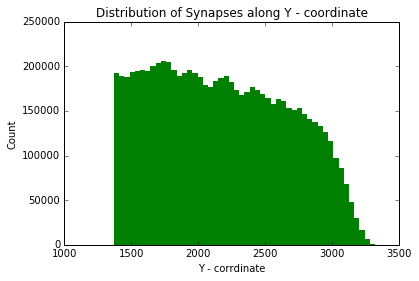

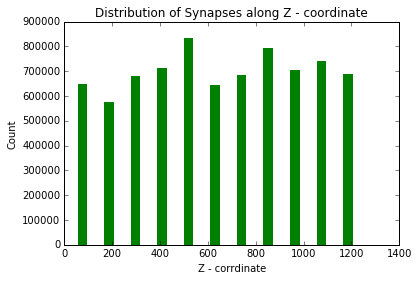

In [51]:
list_x = set(df['cx'])
list_x = sorted(list_x)

x_sum = []
for i in list_x:
    temp = df[df['cx'] == i]['synapses']
    x_sum.append(temp.sum())
bar_width = 40
rects1 = plt.bar(list_x, x_sum, bar_width,
                 color='g', edgecolor = 'none')

plt.title('Distribution of Synapses along X - coordinate')
plt.xlabel('X - corrdinate')
plt.ylabel('Count')
plt.show()

list_y = set(df['cy'])
list_y = sorted(list_y)

y_sum = []
for i in list_y:
    temp = df[df['cy'] == i]['synapses']
    y_sum.append(temp.sum())
bar_width = 40
rects2 = plt.bar(list_y, y_sum, bar_width,
                 color='g', edgecolor = 'none')

plt.title('Distribution of Synapses along Y - coordinate')
plt.xlabel('Y - corrdinate')
plt.ylabel('Count')
plt.show()

list_z = set(df['cz'])
list_z = sorted(list_z)

z_sum = []
for i in list_z:
    temp = df[df['cz'] == i]['synapses']
    z_sum.append(temp.sum())
bar_width = 40
rects1 = plt.bar(list_z, z_sum, bar_width,
                 color='g', edgecolor = 'none')

plt.title('Distribution of Synapses along Z - coordinate')
plt.xlabel('Z - corrdinate')
plt.ylabel('Count')
plt.show()



* What does the distribution of # synapses per bin look like?

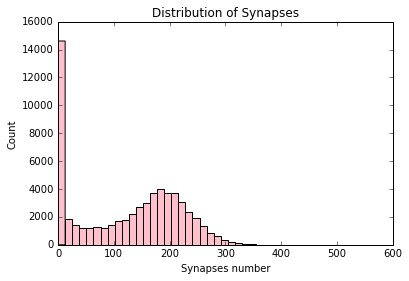

In [32]:
fig_syn = plt.figure()
asyn = fig_syn.add_subplot(111)
asyn.hist(df['synapses'], bins = 40, range = (df['synapses'].min(), df['synapses'].max()),
         color = 'pink')
plt.title('Distribution of Synapses')
plt.xlabel('Synapses number')
plt.ylabel('Count')
plt.show()

* What do some representative slices look like?

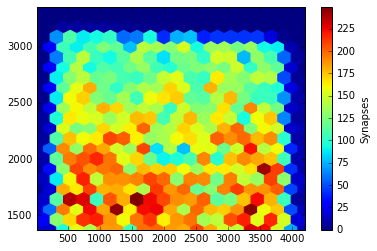

In [49]:
df_1 = df[df['cz'] == 610]

X = df_1['cx']
Y = df_1['cy']
Z = df_1['synapses'] 

x = X.ravel()
y = Y.ravel()
z = Z.ravel()
gridsize = 20
PLT.subplot(111)

PLT.hexbin(x, y, C = z, gridsize = gridsize, cmap=CM.jet, bins = None)
PLT.axis([x.min(), x.max(), y.min(), y.max()])

cb = PLT.colorbar()
cb.set_label('Synapses')
PLT.show()   

* What is the data looks like in boxplot? Are there any outliers?

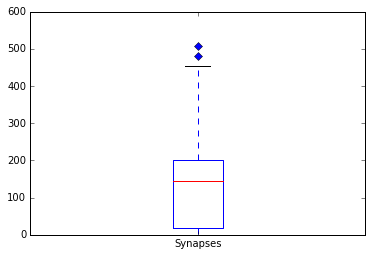

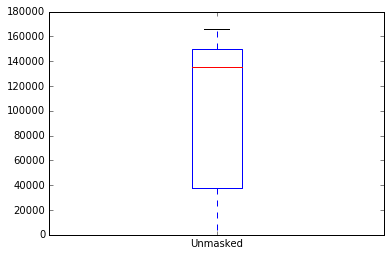

In [35]:
dfT = df.values.T.tolist()
col = [dfT[i] for i in [4]]

fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(col, 0, 'gD')
plt.xticks([1], ['Synapses'])
plt.show()

unmask = dfT[3]
fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(unmask, 0, 'gD')
plt.xticks([1], ['Unmasked'])
plt.show()